In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('/home/jayme/GitHub/daytripper/data/Lekagul Sensor Data.csv')
data.head()

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2


In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['year'] = pd.DatetimeIndex(data['Timestamp']).year
data['month'] = pd.DatetimeIndex(data['Timestamp']).month
data['hour'] = pd.DatetimeIndex(data['Timestamp']).hour

df = data.head(100)
df

,Timestamp,car-id,car-type,gate-name,year,month,hour
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,2015,5,0
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,2015,5,1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,2015,5,1
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,2015,5,1
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,2015,5,1
5,2015-05-01 01:24:02,20154301124328-262,4,general-gate5,2015,5,1
6,2015-05-01 01:31:41,20153101013141-937,1,entrance3,2015,5,1
7,2015-05-01 01:33:57,20154301124328-262,4,entrance4,2015,5,1
8,2015-05-01 01:53:34,20153101013141-937,1,general-gate1,2015,5,1
9,2015-05-01 01:56:20,20153101013141-937,1,ranger-stop2,2015,5,1


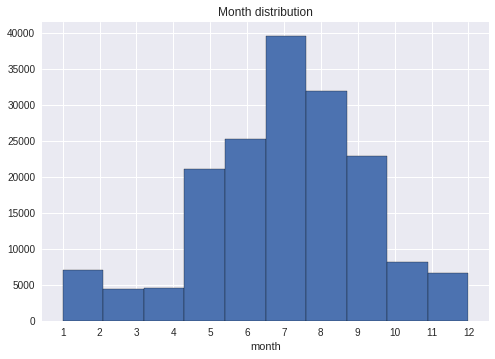

In [4]:
fig, ax = plt.subplots()
ax.hist(data['month'], ec='k')
ax.set_title('Month distribution')
ax.set_xlabel('month')
ax.set_xticks(np.arange(min(data['month']), max(data['month'])+1, 1.0));

Most people go to the park between May and September.

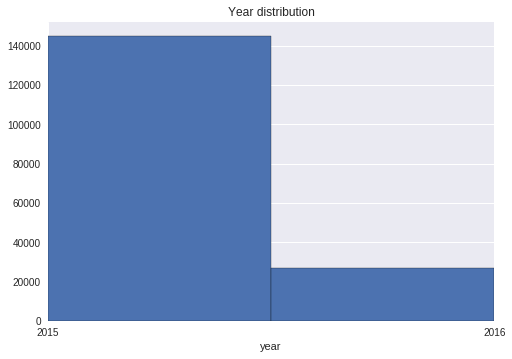

In [5]:
fig, ax = plt.subplots()
ax.hist(data['year'], bins=2, ec='k')
ax.set_title('Year distribution')
ax.set_xlabel('year')
ax.set_xticks(range(2015, 2017, 1))
ax.set_xlim(range(2015, 2017, 1));

The majority of the data concentrates in 2015.

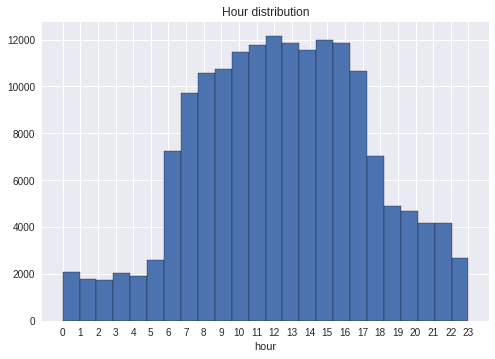

In [6]:
fig, ax = plt.subplots()
ax.hist(data['hour'], bins = 24, ec='k')
ax.set_title('Hour distribution')
ax.set_xlabel('hour')
ax.set_xticks(np.arange(min(data['hour']), max(data['hour'])+1, 1.0));

Most vehicles pass a checkpoint between 6 a.m. and 5 p.m.

In [7]:
#How much time does people spend inside the park:

delta = data.groupby('car-id')['Timestamp'].max() - data.groupby('car-id')['Timestamp'].min()
delta.head()

car-id
20150001010009-284   1 days 06:47:47
20150001050042-811   4 days 00:53:05
20150001060025-421   0 days 00:32:18
20150001070000-174   0 days 00:55:32
20150001070006-104   5 days 13:54:03
Name: Timestamp, dtype: timedelta64[ns]

In [15]:
delta = delta.astype('timedelta64[s]')

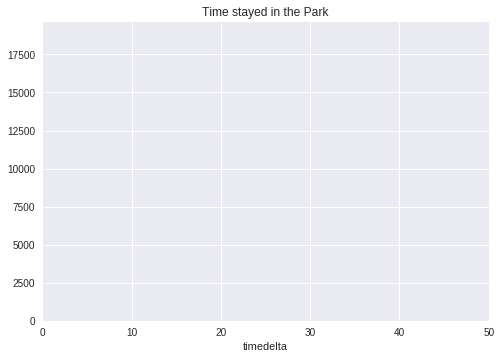

In [9]:
fig, ax = plt.subplots()
ax.hist(delta, ec='k')
ax.set_title('Time stayed in the Park')
ax.set_xlabel('timedelta')
ax.set_xlim(0, 50);

I couldn't plot it, maybe Matplotlib needs 'timedelta' to be converted to other type...